In [1]:
import numpy as np
import pandas as pd

In [23]:
df = pd.read_parquet('part-00000.parquet', engine='pyarrow')

In [501]:
with open('part-00009', "wb") as f:
    pickle.dump(df,f)

timestamp - дата и время совершения события
application_id - идентификатор приложения
client	- Идентификатор клиента 
session_id - Идентификатор сессии
event_type - Тип события
event_category - Категория события
event_name - Имя события
event_label - Дополнительный атрибут события
device_screen_name - Имя экрана на котором произошло событие
timezone - Часовой пояс
device_is_webview - Флаг того что страница открыта внутри webview
page_urlhost - Домен страницы
page_urlpath_full - Путь страницы
net_connection_type - Тип подключения
net_connection_tech - Технология подключения

In [3]:
df.head()

,timestamp,application_id,client,session_id,event_type,event_category,event_name,event_label,device_screen_name,timezone,device_is_webview,page_urlhost,page_urlpath_full,net_connection_type,net_connection_tech
0,2020-01-15 08:46:32.579,anketa,107efb4507525ce982e19331b36b0e2f,9a1366886da59ec85f0ef5e06f1e97f6,pv,None,None,None,None,Asia/Omsk,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None
1,2020-04-29 19:20:09.705,anketa,32dac9ab28a497a8061e02786bb3a95a,bdf7fc21e4e88d1b4f0838c80b21a1e3,pv,None,None,None,None,Asia/Yekaterinburg,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None
2,2020-02-21 03:21:24.058,anketa,489818f57087b59790435b3acf18018a,8bae6c4249db74dc0937e1ff00d61079,pv,None,None,None,None,Asia/Yakutsk,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None
3,2020-08-06 06:54:30.918,anketa,489818f57087b59790435b3acf18018a,3a95ba68795b745ca09ebee138b418ef,pv,None,None,None,None,Asia/Yakutsk,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None
4,2020-02-28 18:51:56.452,anketa,6dde48ffeb6d354628303c9d9b6721be,1db024ef087161f30a3c981cb32bb565,pv,None,None,None,None,Asia/Omsk,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None


In [476]:
df.describe()

,timestamp,application_id,client,session_id,event_type,event_category,event_name,event_label,device_screen_name,timezone,device_is_webview,page_urlhost,page_urlpath_full,net_connection_type,net_connection_tech
count,11811781,11811781,11811781,11811781,11811781,6410434,6329538,1649759,9103890,11811781,11596690,454618,454618,11357163,6624211
unique,11565759,23,8043,959355,5,321,9820,6004,525,164,1,10,14047,3,15
top,2020-01-07 09:39:41,mobile,5e3a38639f7b8a5e191edab1a27ff0f7,ea6a061dfebdbe6326eecbb099ebf04e,se,Application Lifecycle,Foreground,7a4e59a5d9e3bf6484ec3ca5e9f7e277,SignInActivity,Europe/Moscow,True,online.alfabank.ru,ba2a6b9b114d7ee6c89633aa558b55a0,mobile,LTE
freq,29,11357163,28213,7140,6410442,2026904,1088810,703435,1161460,6591631,11596690,200995,39840,6624206,5493313
first,2020-01-01 00:01:49.033000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-09-30 22:09:50.747000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_train = pd.read_csv('alfabattle2_abattle_train_target.csv')

In [704]:
df_gr = df_train.groupby(by='client_pin')

In [1048]:
df_s2 = df_gr.size()[df_gr.size() == 3]
indx = df_s2.index

In [1049]:
lst_part = ['part-00000.parquet', 'part-00001.parquet', 'part-00002.parquet', 'part-00003.parquet', 'part-00004.parquet',
            'part-00005.parquet', 'part-00006.parquet', 'part-00007.parquet', 'part-00008.parquet', 'part-00009.parquet']

In [3]:
import pickle

Сформируем обучающую выборку, состоящую из топовых записей в предыдущий сессии для клиентов из списка cl_ids

In [1051]:
train_list = []
for cur_part in lst_part:
    df = pd.read_parquet(cur_part, engine='pyarrow')
    cl_par = df['client'].unique()
    cl_ids = list(set(cl_par) & set(indx))
    for i in cl_ids:
        tmp_dic = {}
        tmp_df = df_train.loc[df_train['client_pin'] == i].sort_values('timestamp')
        tmp_dic['target'] = list(tmp_df[-1:]['multi_class_target'])[0]
        tmp_dic['predyd'] = list(tmp_df[:-1]['multi_class_target'])[0]
        tmp_dic['time1'] = list(tmp_df[-1:]['timestamp'])[0]
        tmp_dic['time2'] = list(tmp_df[:-1]['timestamp'])[0]
        ses_id = list(tmp_df[:-1]['session_id'])[0]
        df_cl = df.loc[(df['client'] == i) 
           & (df['session_id'] == ses_id)]
        tmp_dic['app_id'] = df_cl['application_id'].max()
        tmp_dic['event_type'] = df_cl['event_type'].max()
        tmp_dic['event_cat'] = df_cl['event_category'].dropna().max()
        tmp_dic['page'] = df_cl['page_urlhost'].dropna().max()
        tmp_dic['net_type'] = df_cl['net_connection_type'].dropna().max()
        tmp_dic['net_tech'] = df_cl['net_connection_tech'].dropna().max()
        train_list.append(tmp_dic)
        
    with open("tr2", "wb") as f:
        pickle.dump(train_list, f)

In [4]:
with open("tr1", "rb") as f:
    tr1 = pickle.load(f)

In [1095]:
with open("tr2", "rb") as f:
    tr2 = pickle.load(f)

In [1013]:
with open("tr3", "rb") as f:
    tr3 = pickle.load(f)

In [1014]:
with open("tr4", "rb") as f:
    tr4 = pickle.load(f)

In [5]:
len(tr1)

1624

In [1097]:
tr2.extend(tr1)

In [1017]:
tr2.extend(tr3)
tr2.extend(tr4)

In [6]:
train_list = tr1

In [7]:
train_df = pd.DataFrame(train_list)

In [8]:
train_df.head()

,target,predyd,time1,time2,app_id,event_type,event_cat,page,net_type,net_tech
0,mobile_recharge,phone_money_transfer,2020-08-15 09:09:26,2020-05-06 16:02:30,mobile,sv,Widget Dashboard,NaN,wifi,NaN
1,main_screen,chat,2020-08-31 22:34:36,2020-08-28 08:00:28,mobile,sv,Widget Dashboard,NaN,wifi,HSPA+
2,main_screen,main_screen,2020-09-13 10:38:09,2020-09-13 09:39:37,mobile,sv,Application Lifecycle,NaN,mobile,LTE
3,invest,credit_info,2020-07-24 23:30:46,2020-06-03 00:52:31,mobile,sv,SingleStatementFilters,NaN,wifi,NaN
4,statement,statement,2020-09-11 09:41:54,2020-09-09 15:37:17,mobile,sv,Widget Dashboard,NaN,mobile,LTE


In [9]:
train_df['time1'] = pd.to_datetime(train_df['time1'], format = '%Y-%m-%d %H:%M:%S')
train_df['time2'] = pd.to_datetime(train_df['time2'], format = '%Y-%m-%d %H:%M:%S')

In [24]:
df['page_urlhost'].unique()

array(['anketa.alfabank.ru', 'ipoteka.alfabank.ru', None,
       'investments.alfabank.ru', 'online.alfabank.ru',
       'private.auth.alfabank.ru', 'click.alfabank.ru', 'alfabank.ru',
       'family.alfabank.ru', 'travel.alfabank.ru', 'partner.alfabank.ru'],
      dtype=object)

In [11]:
train_df['page'] = train_df['page'].fillna(0)

In [12]:
train_df['page0'] = train_df['page'].apply(lambda x: 1 if x == 0 else 0)
train_df['page1'] = train_df['page'].apply(lambda x: 1 if x == 'anketa.alfabank.ru' else 0)
train_df['page2'] = train_df['page'].apply(lambda x: 1 if x == 'ipoteka.alfabank.ru' else 0)
train_df['page3'] = train_df['page'].apply(lambda x: 1 if x == 'investments.alfabank.ru' else 0)
train_df['page4'] = train_df['page'].apply(lambda x: 1 if x == 'online.alfabank.ru' else 0)
train_df['page5'] = train_df['page'].apply(lambda x: 1 if x == 'business.auth.alfabank.ru' else 0)
train_df['page6'] = train_df['page'].apply(lambda x: 1 if x == 'private.auth.alfabank.ru' else 0)
train_df['page7'] = train_df['page'].apply(lambda x: 1 if x == 'click.alfabank.ru' else 0)
train_df['page8'] = train_df['page'].apply(lambda x: 1 if x == 'alfabank.ru' else 0)
train_df['page9'] = train_df['page'].apply(lambda x: 1 if x == 'travel.alfabank.ru' else 0)
train_df['page10'] = train_df['page'].apply(lambda x: 1 if x == 'partner.alfabank.ru' else 0)


In [1106]:
df['net_connection_type'].unique()

array([None, 'mobile', 'offline', 'wifi'], dtype=object)

In [13]:
train_df['net_type'] = train_df['net_type'].fillna(0)

In [14]:
train_df['net_type0'] = train_df['net_type'].apply(lambda x: 1 if x == 0 else 0)
train_df['net_type1'] = train_df['net_type'].apply(lambda x: 1 if x == 'mobile' else 0)
train_df['net_type2'] = train_df['net_type'].apply(lambda x: 1 if x == 'offline' else 0)
train_df['net_type3'] = train_df['net_type'].apply(lambda x: 1 if x == 'wifi' else 0)

In [1109]:
df['net_connection_tech'].unique()

array([None, 'HSPA+', 'LTE', 'DCHSPAP', 'DC_HSPAP', 'EDGE', 'GPRS', 'GSM',
       'HSDPA', 'HSPA', 'HSUPA', 'IWLAN', 'LTE_CA', 'TD_SCDMA', 'UMTS',
       'UNKNOWN'], dtype=object)

In [15]:
train_df.shape

(1624, 25)

In [16]:
seq_days1 = []
seq_days2 = []
seq_days3 = []
seq_days4 = []
seq_days5 = []
seq_days6 = []
seq_days7 = []
for i in range(len(train_df)):
    if (train_df.iloc[i]['time1'] - train_df.iloc[i]['time2']).total_seconds() < 86400*1:
        seq_days1.append([0])
    else:
        seq_days1.append([1])
    if (train_df.iloc[i]['time1'] - train_df.iloc[i]['time2']).total_seconds() < 86400*2:
        seq_days2.append([0])
    else:
        seq_days2.append([1])
    if (train_df.iloc[i]['time1'] - train_df.iloc[i]['time2']).total_seconds() < 86400*3:
        seq_days3.append([0])
    else:
        seq_days3.append([1])
    if (train_df.iloc[i]['time1'] - train_df.iloc[i]['time2']).total_seconds() < 86400*4:
        seq_days4.append([0])
    else:
        seq_days4.append([1])
    if (train_df.iloc[i]['time1'] - train_df.iloc[i]['time2']).total_seconds() < 86400*5:
        seq_days5.append([0])
    else:
        seq_days5.append([1])
    if (train_df.iloc[i]['time1'] - train_df.iloc[i]['time2']).total_seconds() < 86400*6:
        seq_days6.append([0])
    else:
        seq_days6.append([1])
    if (train_df.iloc[i]['time1'] - train_df.iloc[i]['time2']).total_seconds() < 86400*7:
        seq_days7.append([0])
    else:
        seq_days7.append([1])


In [17]:
len(seq_days1)

1624

In [1112]:
df.head()

,timestamp,application_id,client,session_id,event_type,event_category,event_name,event_label,device_screen_name,timezone,device_is_webview,page_urlhost,page_urlpath_full,net_connection_type,net_connection_tech
0,2020-07-26 11:36:19.715,anketa,e2fa60779cd72bd1fe507cfb29861a73,5068e8690c366a9a848534781d221418,pv,None,None,None,None,Europe/Minsk,True,anketa.alfabank.ru,02f942ee7ac6b55b6776b4af33d2b1a9,None,None
1,2020-07-26 11:39:59.702,anketa,e2fa60779cd72bd1fe507cfb29861a73,5068e8690c366a9a848534781d221418,pv,None,None,None,None,Europe/Minsk,True,anketa.alfabank.ru,02f942ee7ac6b55b6776b4af33d2b1a9,None,None
2,2020-06-05 22:31:50.839,anketa,149ffff87bb793e49097e89b7634f048,2458e7b8e9415e7ead1486485572b318,pv,None,None,None,None,Europe/Minsk,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None
3,2020-07-21 10:01:49.360,anketa,19dd8a1e6136e6c8262fb73efd68d624,02a0b24e3ad81c14f230980f9bb363ac,pv,None,None,None,None,Europe/Minsk,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None
4,2020-07-09 19:26:23.351,anketa,19dd8a1e6136e6c8262fb73efd68d624,610c440cdbbb967c4f34973c9fb228f8,pv,None,None,None,None,Europe/Minsk,True,anketa.alfabank.ru,03eb3ceab6204f8b602f1863f7fbce01,None,None


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vect_pred = CountVectorizer()
vect_pred.fit(df_train['multi_class_target'].unique())

CountVectorizer()

In [25]:
vect_app = CountVectorizer()
vect_app.fit(df['application_id'].unique())

CountVectorizer()

In [26]:
vect_type = CountVectorizer()
vect_type.fit(df['event_type'].unique())

CountVectorizer()

In [27]:
vect_cat = CountVectorizer()
df['event_category'] = df['event_category'].fillna('Empty')
vect_cat.fit(df['event_category'].unique())

CountVectorizer()

In [28]:
vect_ntech = CountVectorizer()
df['net_connection_tech'] = df['net_connection_tech'].fillna('Empty')
vect_ntech.fit(df['net_connection_tech'].unique())

CountVectorizer()

In [29]:
train_df['target'] = train_df['target'].apply(lambda x: 0 if x == 'statement' else x)
train_df['target'] = train_df['target'].apply(lambda x: 1 if x == 'mobile_recharge' else x)
train_df['target'] = train_df['target'].apply(lambda x: 2 if x == 'main_screen' else x)
train_df['target'] = train_df['target'].apply(lambda x: 3 if x == 'card2card_transfer' else x)
train_df['target'] = train_df['target'].apply(lambda x: 4 if x == 'phone_money_transfer' else x)
train_df['target'] = train_df['target'].apply(lambda x: 5 if x == 'own_transfer' else x)
train_df['target'] = train_df['target'].apply(lambda x: 6 if x == 'chat' else x)
train_df['target'] = train_df['target'].apply(lambda x: 7 if x == 'invest' else x)
train_df['target'] = train_df['target'].apply(lambda x: 8 if x == 'card_recharge' else x)
train_df['target'] = train_df['target'].apply(lambda x: 9 if x == 'credit_info' else x)

In [30]:
X_pred = vect_pred.transform(train_df['predyd']).toarray()
X_app = vect_app.transform(train_df['app_id']).toarray()
X_type = vect_type.transform(train_df['event_type']).toarray()
train_df['event_cat'] = train_df['event_cat'].fillna('Empty')
X_cat = vect_cat.transform(train_df['event_cat']).toarray()
train_df['net_tech'] = train_df['net_tech'].fillna('Empty')
X_ntech = vect_ntech.transform(train_df['net_tech']).toarray()

In [31]:
pages = np.array(train_df[['page0','page1','page2','page3', 'page4', 'page5', 
                           'page6', 'page7', 'page8', 'page9', 'page10']])

In [32]:
net_types = np.array(train_df[['net_type0', 'net_type1', 'net_type2', 'net_type3']])

In [1117]:
page3[0]

array([0], dtype=int64)

In [33]:
data_nonbinary = np.concatenate((X_pred, X_app, X_type, X_cat, X_ntech, pages, net_types,
                                 seq_days1, seq_days2, seq_days3, seq_days4, seq_days5, seq_days6, seq_days7), axis=1)

In [34]:
data_nonbinary.shape

(1624, 405)

In [35]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=2)

In [53]:
pca.fit(data_nonbinary)

PCA(n_components=2)

In [54]:
X_2D = pca.transform(data_nonbinary)

In [56]:
train_df['PCA1'] = X_2D[:, 0]
train_df['PCA2'] = X_2D[:, 1]

In [57]:
%matplotlib inline
import seaborn as sns

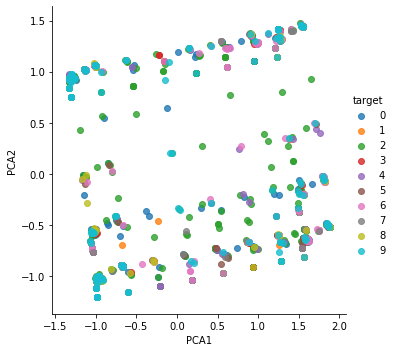

In [58]:
sns.lmplot("PCA1", "PCA2", hue='target', data=train_df, fit_reg=False);

In [61]:
from sklearn.mixture import GaussianMixture

In [80]:
gmm = GaussianMixture(n_components=3, covariance_type='full')

In [81]:
gmm.fit(data_nonbinary)

GaussianMixture(n_components=3)

In [82]:
train_df['target'].unique()

array([1, 2, 7, 0, 5, 9, 6, 4, 3, 8], dtype=int64)

In [83]:
y_gmm = gmm.predict(data_nonbinary)

In [84]:
train_df['cluster'] = y_gmm

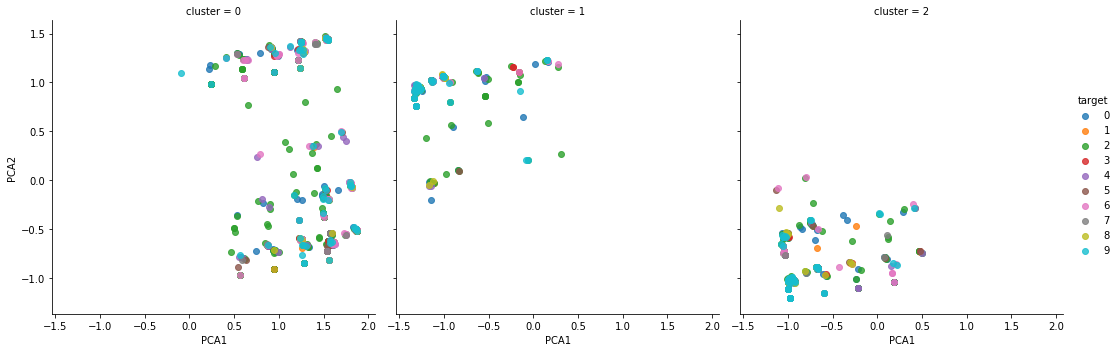

In [85]:
sns.lmplot("PCA1", "PCA2", data=train_df, hue='target', col='cluster', fit_reg=False);

In [86]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(data_nonbinary)
data_projected = iso.transform(data_nonbinary)
data_projected.shape

(1624, 2)

In [88]:
import matplotlib.pyplot as plt

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    data_nonbinary, train_df['target'], random_state=0)

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

In [1122]:
fscore = {}
for mf in range(10, 360, 10):
    for lr in range(1, 21):
        gbc = GradientBoostingClassifier(random_state=0, max_features=mf, learning_rate=lr/100, n_estimators=100)
        #gbc.fit(data_nonbinary, train_df['target'])
        gbc.fit(X_train, y_train)
        y_pred = gbc.predict(X_test)
        fscore[f1_score(y_test, y_pred, average='macro')] = [lr/100, mf]
        #print("lr = ", lr/100, "max_f = ", mf, "f1 = ", f1_score(y_test, y_pred, average='macro')) 
    print(max(fscore.keys()))

0.13072059989980794
0.15283993340939142
0.15283993340939142
0.15283993340939142
0.15283993340939142
0.15283993340939142
0.15283993340939142
0.1555761573461692
0.1555761573461692
0.1555761573461692
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543
0.1674127276531543


In [930]:
max(fscore.keys())

0.1941538052274351

In [1091]:
max(fscore.keys())

0.1798498241775128

In [1092]:
fscore[0.1798498241775128]

[0.1, 160]

In [1077]:
# tr2
gbc = GradientBoostingClassifier(random_state=0, max_features=160, learning_rate=0.1, n_estimators=100)
#gbc.fit(data_nonbinary, train_df['target'])
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))


0.1798498241775128


In [95]:
# tr1
gbc = GradientBoostingClassifier(random_state=0, max_features=70, learning_rate=0.19, n_estimators=100)
#gbc.fit(data_nonbinary, train_df['target'])
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))


0.1844543106093339


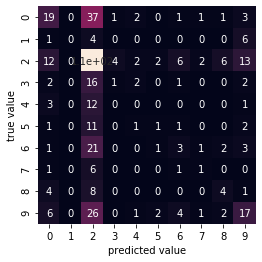

In [106]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [107]:
from sklearn.model_selection import KFold, cross_val_score

In [643]:
# Функция преобразования в числовой target
def transform_dig(word):
    if word == 'statement':
        return 0
    elif word == 'mobile_recharge':
        return 1
    elif word == 'main_screen':
        return 2
    elif word == 'card2card_transfer':
        return 3
    elif word == 'phone_money_transfer':
        return 4
    elif word == 'own_transfer':
        return 5
    elif word == 'chat':
        return 6
    elif word == 'invest':
        return 7
    elif word == 'card_recharge':
        return 8
    elif word == 'credit_info' :
        return 9  

In [1089]:
for lr in range(20):
    y_pred = []
    #gbc = GradientBoostingClassifier(random_state=0, max_features='log2', learning_rate=0.14, n_estimators=100)
    #gbc.fit(data_nonbinary, train_df['target'])
    #gbc.fit(X_train, y_train)
    for i in X_test:
        if max(gbc.predict_proba([i])[0]) > 0.05*lr:
            y_pred.append(gbc.predict([i])[0])
        else:
            pred_w = vect_pred.inverse_transform(i[:10])[0][0]
            y_pred.append(transform_dig(pred_w))
                        
    print("lr = ", 0.05*lr, "f1 = ", f1_score(y_test, y_pred, average='macro'))    

lr =  0.0 f1 =  0.1798498241775128
lr =  0.05 f1 =  0.1798498241775128
lr =  0.1 f1 =  0.1798498241775128
lr =  0.15000000000000002 f1 =  0.1798498241775128
lr =  0.2 f1 =  0.1798498241775128
lr =  0.25 f1 =  0.1798498241775128
lr =  0.30000000000000004 f1 =  0.1918212186172451
lr =  0.35000000000000003 f1 =  0.21960538500486965
lr =  0.4 f1 =  0.2541415407021237
lr =  0.45 f1 =  0.2625453351844928
lr =  0.5 f1 =  0.2594426954604341
lr =  0.55 f1 =  0.2633513920980876
lr =  0.6000000000000001 f1 =  0.264004887017196
lr =  0.65 f1 =  0.25747248095132136
lr =  0.7000000000000001 f1 =  0.24934396800749042
lr =  0.75 f1 =  0.24908841487423947
lr =  0.8 f1 =  0.24768772062524805
lr =  0.8500000000000001 f1 =  0.24637938929987765
lr =  0.9 f1 =  0.24637938929987765
lr =  0.9500000000000001 f1 =  0.24637938929987765


In [624]:
gbc = GradientBoostingClassifier(random_state=0, max_features=70, learning_rate=0.19, n_estimators=100)
gbc.fit(data_nonbinary, train_df['target'])
#gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.14, max_features='log2',
                           random_state=0)

Создали модель. Теперь берем данные, из которых нужно сделать предсказание

In [639]:
vect_pred.inverse_transform(X_test[0][:10])[0][0]

'card2card_transfer'

In [639]:
vect_pred.inverse_transform(X_test[0][:10])[0][0]

'card2card_transfer'

In [939]:
#X_pred, X_app, X_type, X_cat, X_ntech, pages, net_types, seq_days3
print(len(X_pred[0]), len(X_app[0]), len(X_type[0]), len(X_cat[0]),
      len(X_ntech[0]), len(pages[0]), len(net_types[0]), len(seq_days3[0]))
len(X_test[0])
X1 = len(X_pred[0])
X2 = X1 + len(X_app[0])
X3 = X2 + len(X_type[0])
X4 = X3 + len(X_cat[0])
X5 = X4 + len(X_ntech[0])
X6 = X5 + len(pages[0])
X7 = X6 + len(net_types[0])
X8 = X7 + len(seq_days3[0])
print(X1, X2, X3, X4, X5, X6, X7, X8)
print(len(X_test[0]))

10 25 5 319 15 11 4 1
10 35 40 359 374 385 389 390
390


In [377]:
train_df['predyd']

0        own_transfer
1         credit_info
2         main_screen
3        own_transfer
4         credit_info
            ...      
1549    card_recharge
1550      main_screen
1551             chat
1552      main_screen
1553      credit_info
Name: predyd, Length: 1554, dtype: object

In [520]:
train_df['predyd'] = train_df['predyd'].apply(lambda x: 0 if x == 'statement' else x)
train_df['predyd'] = train_df['predyd'].apply(lambda x: 1 if x == 'mobile_recharge' else x)
train_df['predyd'] = train_df['predyd'].apply(lambda x: 2 if x == 'main_screen' else x)
train_df['predyd'] = train_df['predyd'].apply(lambda x: 3 if x == 'card2card_transfer' else x)
train_df['predyd'] = train_df['predyd'].apply(lambda x: 4 if x == 'phone_money_transfer' else x)
train_df['predyd'] = train_df['predyd'].apply(lambda x: 5 if x == 'own_transfer' else x)
train_df['predyd'] = train_df['predyd'].apply(lambda x: 6 if x == 'chat' else x)
train_df['predyd'] = train_df['predyd'].apply(lambda x: 7 if x == 'invest' else x)
train_df['predyd'] = train_df['predyd'].apply(lambda x: 8 if x == 'card_recharge' else x)
train_df['predyd'] = train_df['predyd'].apply(lambda x: 9 if x == 'credit_info' else x)

In [521]:
f1_score(train_df['target'], train_df['predyd'], average='macro')

0.21949432062906635

1 - 0.26
2 - 0.23
3 - 0.226
4 - 0.219

In [324]:
train_df['pr1']

0       phone_money_transfer
1                       chat
2                main_screen
3                          9
4                  statement
                ...         
1619                       9
1620                       9
1621                       9
1622                    chat
1623               statement
Name: pr1, Length: 1624, dtype: object

In [183]:
gbc = GradientBoostingClassifier(random_state=0, max_features='log2', learning_rate=0.12)
gbc.fit(data_nonbinary, train_df['target'])


GradientBoostingClassifier(learning_rate=0.12, max_features='log2',
                           random_state=0)

In [1007]:
df_res = pd.read_csv("res9.csv")

In [1008]:
df_s1 = df_gr.size()[df_gr.size() == 1]
indx = df_s1.index

In [980]:
df = pd.read_parquet('part-00000.parquet', engine='pyarrow')
cl_par = df['client'].unique()
cl_ids = list(set(cl_par) & set(indx))

In [982]:
len(cl_ids)

161

In [983]:
# Функция преобразования в строковый target
def transform_target(dig):
    if dig == 0:
        return 'statement'
    elif dig == 1:
        return 'mobile_recharge'
    elif dig == 2:
        return 'main_screen'
    elif dig == 3:
        return 'card2card_transfer'
    elif dig == 4:
        return 'phone_money_transfer'
    elif dig == 5:
        return 'own_transfer'
    elif dig == 6:
        return 'chat'
    elif dig == 7:
        return 'invest'
    elif dig == 8:
        return 'card_recharge'
    elif dig == 9:
        return 'credit_info' 

In [984]:
def trans_pages(page):
    if page == 'anketa.alfabank.ru':
        return [0,1,0,0,0,0,0,0,0,0,0]
    elif page == 'ipoteka.alfabank.ru':
        return [0,0,1,0,0,0,0,0,0,0,0]
    elif page == 'investments.alfabank.ru':
        return [0,0,0,1,0,0,0,0,0,0,0]
    elif page == 'online.alfabank.ru':
        return [0,0,0,0,1,0,0,0,0,0,0]
    elif page == 'business.auth.alfabank.ru':
        return [0,0,0,0,0,1,0,0,0,0,0]
    elif page == 'private.auth.alfabank.ru':
        return [0,0,0,0,0,0,1,0,0,0,0]
    elif page == 'click.alfabank.ru':
        return [0,0,0,0,0,0,0,1,0,0,0]
    elif page == 'alfabank.ru':
        return [0,0,0,0,0,0,0,0,1,0,0]
    elif page == 'travel.alfabank.ru':
        return [0,0,0,0,0,0,0,0,0,1,0]
    elif page == 'partner.alfabank.ru':
        return [0,0,0,0,0,0,0,0,0,0,1]
    else:
        return [1,0,0,0,0,0,0,0,0,0,0]
        

In [985]:
def trans_types(types):
    if types == 'mobile':
        return [0,1,0,0]
    elif types == 'offline':
        return [0,0,1,0]
    elif types == 'wifi':
        return [0,0,0,1]
    else:
        return [1,0,0,0]

In [986]:
from datetime import datetime

In [987]:
len(cl_ids)

161

In [1006]:
lst_part

['part-00000.parquet',
 'part-00001.parquet',
 'part-00002.parquet',
 'part-00003.parquet',
 'part-00004.parquet',
 'part-00005.parquet',
 'part-00006.parquet',
 'part-00007.parquet',
 'part-00008.parquet',
 'part-00009.parquet']

In [1009]:
for fl in lst_part:
    print(fl)
    df = pd.read_parquet(fl, engine='pyarrow')
    cl_par = df['client'].unique()
    cl_ids = list(set(cl_par) & set(indx))
    for i in cl_ids:
        tmp_dic = {}
        tmp_df = df_train.loc[df_train['client_pin'] == i].sort_values('timestamp')
        X_pred_out = list(tmp_df['multi_class_target'])[0]
        ses_id = list(tmp_df['session_id'])[0]
        df_cl = df.loc[(df['client'] == i) 
           & (df['session_id'] == ses_id)]
        X_app_out = df_cl['application_id'].dropna().max()

        X_type_out = df_cl['event_type'].dropna().max()

        #df_cl['event_category'] = df_cl['event_category'].fillna('Empty')
        X_cat_out = df_cl['event_category'].dropna().max()
        if type(X_cat_out) == float:
            X_cat_out = 'Empty'

        #df_cl['net_connection_type'] = df_cl['net_connection_type'].fillna('Empty')
        X_ntech_out = df_cl['net_connection_type'].dropna().max()

        X_pred_out = vect_pred.transform([X_pred_out]).toarray()
        X_app_out = vect_app.transform([X_app_out]).toarray()
        X_type_out = vect_type.transform([X_type_out]).toarray()
        X_cat_out = vect_cat.transform([X_cat_out]).toarray()
        X_ntech_out = vect_ntech.transform([X_ntech_out]).toarray()

        pages_out = [trans_pages(df_cl['page_urlhost'].dropna().max())]
        net_types_out = [trans_types(df_cl['net_connection_type'].dropna().max())]

        time1 = list(df_pred[df_pred['client_pin'] == i]['timestamp'])[0]
        time2 = list(tmp_df['timestamp'])[0]
        time1 = datetime.strptime(time1, '%Y-%m-%d %H:%M:%S')
        time2 = datetime.strptime(time2, '%Y-%m-%d %H:%M:%S')
        if (time1 - time2).days < 3:
            seq_days_out = [[0]]
        else:
            seq_days_out = [[1]]

        #X_pred, X_app, X_type, X_cat, X_ntech, pages, net_types, seq_days3
        data_out = np.concatenate((X_pred_out,X_app_out, X_type_out, X_cat_out, X_ntech_out, pages_out,
                                   net_types_out, seq_days_out), axis=1)

        if max(gbc.predict_proba(data_out)[0]) > 0.9:
            pred_d = gbc.predict(data_out)[0]
            pred_w = transform_target(pred_d)
            if pred_w != vect_pred.inverse_transform(data_out[0][:10])[0][0]:
                print(pred_w, "-->", vect_pred.inverse_transform(data_out[0][:10])[0][0])
        else:
            pred_w = vect_pred.inverse_transform(data_out[0][:10])[0][0]
        #print(df_res['prediction'][df_res['client_pin'] == i], pred_w)
        df_res['prediction'][df_res['client_pin'] == i]=pred_w



part-00000.parquet
statement --> chat
main_screen --> invest
main_screen --> card2card_transfer
invest --> statement
chat --> own_transfer
main_screen --> card_recharge
phone_money_transfer --> chat
part-00001.parquet
statement --> invest
main_screen --> statement
invest --> phone_money_transfer
chat --> statement
main_screen --> card2card_transfer
part-00002.parquet
main_screen --> invest
phone_money_transfer --> chat
part-00003.parquet
phone_money_transfer --> card2card_transfer
part-00004.parquet
part-00005.parquet
main_screen --> statement
statement --> invest
card2card_transfer --> mobile_recharge
statement --> invest
part-00006.parquet
part-00007.parquet
own_transfer --> invest
main_screen --> invest
part-00008.parquet
main_screen --> card_recharge
invest --> phone_money_transfer
main_screen --> own_transfer
chat --> card_recharge
part-00009.parquet
main_screen --> card_recharge
invest --> credit_info
invest --> credit_info
chat --> phone_money_transfer


In [1010]:
df_res.to_csv('res.csv', index=False)

In [952]:
df_cl['page_urlhost'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: page_urlhost, dtype: object

In [82]:
tmp_df = df_train.loc[df_train['client_pin'] == i].sort_values('timestamp')

In [85]:
list(tmp_df[-1:]['multi_class_target'])[0]

'mobile_recharge'

In [36]:
df_train.loc[df_train['client_pin'] == cl_ids[3]].sort_values('timestamp')

,session_id,client_pin,timestamp,multi_class_target
2869636,a146839693c8a28f3bb98d888ce28ce3,95d0e4ae75ca9057a78a627dd3b78153,2020-06-03 00:52:31,credit_info
3486193,0f3c8950bf2c8179d3bbb77b184a46a3,95d0e4ae75ca9057a78a627dd3b78153,2020-07-24 23:30:46,invest


In [38]:
df_train.loc[df_train['client_pin'] == cl_ids[3]].sort_values('timestamp')[-1:]['multi_class_target']

3486193    invest
Name: multi_class_target, dtype: object

In [39]:
df_train.loc[df_train['client_pin'] == cl_ids[3]].sort_values('timestamp')[:-1]['multi_class_target']

2869636    credit_info
Name: multi_class_target, dtype: object

In [40]:
df_train.loc[df_train['client_pin'] == cl_ids[3]].sort_values('timestamp')[:-1]['session_id']

2869636    a146839693c8a28f3bb98d888ce28ce3
Name: session_id, dtype: object

In [45]:
df_cl = df.loc[(df['client'] == cl_ids[3]) 
       & (df['session_id'] == 'a146839693c8a28f3bb98d888ce28ce3')]

In [73]:
[df_cl['application_id'].max(), df_cl['event_type'].max(), df_cl['event_category'].dropna().max()]

['mobile', 'sv', 'SingleStatementFilters']

In [54]:
df.describe()

,timestamp,application_id,client,session_id,event_type,event_category,event_name,event_label,device_screen_name,timezone,device_is_webview,page_urlhost,page_urlpath_full,net_connection_type,net_connection_tech
count,12468595,12468595,12468595,12468595,12468595,6766054,6682190,1751796,9665011,12468595,12243467,437725,437725,12030870,7000769
unique,12205780,23,8211,1004032,5,334,10397,6369,535,169,1,10,14207,3,14
top,2020-01-09 06:51:16,mobile,ab3851b3743e3c68a0e734262afa3a68,2e5dd1eef55786a3a161b45375bfae25,se,Application Lifecycle,Foreground,7a4e59a5d9e3bf6484ec3ca5e9f7e277,SignInActivity,Europe/Moscow,True,online.alfabank.ru,fbb19948fb982a9efafde85cf39ed6ed,mobile,LTE
freq,20,12030870,28570,4683,6766070,2118633,1136388,760988,1225890,7056856,12243467,201946,22793,6998385,5781267
first,2020-01-01 00:00:40.377000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-09-30 22:35:35.518000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df['net_connection_type'].unique()

array([None, 'mobile', 'offline', 'wifi'], dtype=object)

In [8]:
indx[0]

'0003653d4fa5e963ef379d65dd1d26ef'

В рамках одной сессии у клиента несколько записей
Отсортируем их по времени

In [39]:
df.loc[(df['client'] == '107efb4507525ce982e19331b36b0e2f') 
       & (df['session_id'] == '918e6d9bd2f072a0d107b12ba9ec8793')].sort_values('timestamp')

,timestamp,application_id,client,session_id,event_type,event_category,event_name,event_label,device_screen_name,timezone,device_is_webview,page_urlhost,page_urlpath_full,net_connection_type,net_connection_tech
1191534,2020-06-19 10:23:22.356,mobile,107efb4507525ce982e19331b36b0e2f,918e6d9bd2f072a0d107b12ba9ec8793,se,Application Lifecycle,Foreground,None,None,Asia/Krasnoyarsk,True,None,None,mobile,LTE
8995796,2020-06-19 10:23:23.019,mobile,107efb4507525ce982e19331b36b0e2f,918e6d9bd2f072a0d107b12ba9ec8793,sv,None,None,None,SignInActivity,Asia/Krasnoyarsk,True,None,None,mobile,LTE
8248656,2020-06-19 10:23:26.475,mobile,107efb4507525ce982e19331b36b0e2f,918e6d9bd2f072a0d107b12ba9ec8793,sv,None,None,None,MainListOnWidgetsFragment,Asia/Krasnoyarsk,True,None,None,mobile,LTE
3709140,2020-06-19 10:23:27.068,mobile,107efb4507525ce982e19331b36b0e2f,918e6d9bd2f072a0d107b12ba9ec8793,se,Widget Dashboard,Error,4930579a044a6143726f5a2dfca83203,Widget Dashboard,Asia/Krasnoyarsk,True,None,None,mobile,LTE
2613411,2020-06-19 10:23:33.428,mobile,107efb4507525ce982e19331b36b0e2f,918e6d9bd2f072a0d107b12ba9ec8793,se,Bottom Navigation,Click > All payments screen Tab,None,Main list,Asia/Krasnoyarsk,True,None,None,mobile,LTE
7165468,2020-06-19 10:23:33.562,mobile,107efb4507525ce982e19331b36b0e2f,918e6d9bd2f072a0d107b12ba9ec8793,sv,None,None,None,AllPaymentsFragmentNoTemplates,Asia/Krasnoyarsk,True,None,None,mobile,LTE
1983321,2020-06-19 10:23:37.325,mobile,107efb4507525ce982e19331b36b0e2f,918e6d9bd2f072a0d107b12ba9ec8793,se,All Payments,Interbank click,None,All Payments,Asia/Krasnoyarsk,True,None,None,mobile,LTE
3648905,2020-06-19 10:23:37.448,mobile,107efb4507525ce982e19331b36b0e2f,918e6d9bd2f072a0d107b12ba9ec8793,se,Payment Hub,Contact permission granted,None,Transfer hub,Asia/Krasnoyarsk,True,None,None,mobile,LTE
8817420,2020-06-19 10:23:37.464,mobile,107efb4507525ce982e19331b36b0e2f,918e6d9bd2f072a0d107b12ba9ec8793,sv,None,None,None,PaymentHubActivity,Asia/Krasnoyarsk,True,None,None,mobile,LTE
3658440,2020-06-19 10:23:37.464,mobile,107efb4507525ce982e19331b36b0e2f,918e6d9bd2f072a0d107b12ba9ec8793,se,Payment Hub,User has phone in clipboard,None,Transfer hub,Asia/Krasnoyarsk,True,None,None,mobile,LTE


Начнем делать предсказания по предыдущим действиям из набора тренировочных данных "train_target"

Загружаем тренировочные данные

In [2]:
df_train = pd.read_csv('alfabattle2_abattle_train_target.csv')

client - Идентификатор клиента 
session_id - Идентификатор сессии
timestamp - Время начала сессии
target - Целевое действие внутри сессии, multi-class переменная

In [11]:
df_train.head()

,session_id,client_pin,timestamp,multi_class_target
0,0000029e72e5fcde6a9f29c3a3ed198f,7cf9221322a0e2fdefb1b998b8f2ab29,2020-06-15 14:01:12,main_screen
1,00063dffa47b0fe5556b2b9e8beddb6a,5f16c0ab27a806fd08db3122921adf3a,2020-03-21 12:59:34,invest
2,0007857f36d268ec46fcb7305538a1c7,ec868fc2b388293cf10e18ee9518d72f,2020-01-24 18:18:55,statement
3,000a7f25fc3609cdfda54c5f059aab00,91f55a33d7502c1a1fa5da7ff2f7b648,2020-03-15 19:50:23,main_screen
4,000b746d6616669663feaa1474ac97f1,3ef1020bda95ce7836d2680fa553ecb7,2020-02-20 07:56:58,main_screen


In [26]:
df_train.loc[(df_train['client_pin'] == '107efb4507525ce982e19331b36b0e2f') 
             & (df_train['session_id'] == '918e6d9bd2f072a0d107b12ba9ec8793')]

,session_id,client_pin,timestamp,multi_class_target
31786,918e6d9bd2f072a0d107b12ba9ec8793,107efb4507525ce982e19331b36b0e2f,2020-06-19 10:23:22,phone_money_transfer


In [36]:
df_train[df_train['client_pin'] == '90725b54ce77576883813d87749df6bd'].sort_values('timestamp')

,session_id,client_pin,timestamp,multi_class_target
191412,759db7c0ff301b6d5481a382c6a1c096,90725b54ce77576883813d87749df6bd,2020-01-01 15:20:39,statement
10044,7fc9a75073fb6bbdf0bb117a63e0f79d,90725b54ce77576883813d87749df6bd,2020-01-03 17:20:12,statement
322849,f164b5fc3de6f60dff4fafc554cd39be,90725b54ce77576883813d87749df6bd,2020-01-10 17:25:12,own_transfer
3915485,414c7385c815399b707bf32743825a6e,90725b54ce77576883813d87749df6bd,2020-01-11 14:28:16,statement
3368867,4ac469f245290d45768f1c8db7bb1c58,90725b54ce77576883813d87749df6bd,2020-01-19 19:14:15,statement
381724,d9e2e9dfba82f8fa8d60f40b4257a1cb,90725b54ce77576883813d87749df6bd,2020-01-24 17:04:15,mobile_recharge
701378,97eea17547cd0994d18c88f1b5250d9f,90725b54ce77576883813d87749df6bd,2020-01-26 11:07:16,statement
3029042,8280d2c958ab2732659290ee40852ef5,90725b54ce77576883813d87749df6bd,2020-01-26 12:24:05,statement
3018160,f80f5328d5dcf706009e9228579e23ea,90725b54ce77576883813d87749df6bd,2020-01-27 15:25:22,statement
832793,12ccc5aa956719bf7fb730162878198e,90725b54ce77576883813d87749df6bd,2020-01-27 15:44:43,statement


В этих данных у клиента несколько сессий с multi_class_target. По ним и попытаемся предсказать следующее действие

In [41]:
df_train['session_id'].describe()

count                              5065350
unique                             5065350
top       6028ee8e0fce1afc72c4ace1756846ad
freq                                     1
Name: session_id, dtype: object

Количество уникальных session_id равно количеству записей, т.е. нет двух и более одинаковых session_id

In [37]:
df_train['multi_class_target'].describe()

count         5065350
unique             10
top       main_screen
freq          2280763
Name: multi_class_target, dtype: object

Наиболее часто main_screen (почти 50%)
Посмотрим на все 10 действий

In [38]:
df_train['multi_class_target'].unique()

array(['main_screen', 'invest', 'statement', 'phone_money_transfer',
       'own_transfer', 'credit_info', 'chat', 'card2card_transfer',
       'mobile_recharge', 'card_recharge'], dtype=object)

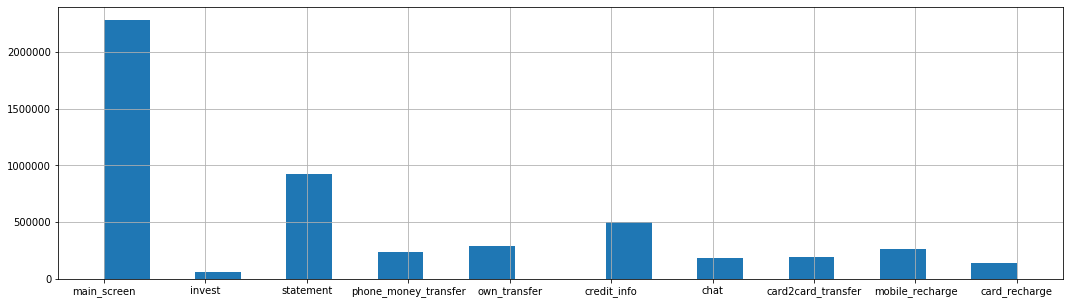

In [77]:
df_train['multi_class_target'].hist(figsize=(18,5), bins=20)

Предсказание строим по обработке последовательностей чувствительной к порядку следования. 
Поэтому выбираем рекурентную нейронную сеть

In [78]:
# Создадим функцию генератор, возвращающая последовательности образцов и их целей
# data — исходный массив вещественных чисел
# lookback — количество интервалов в прошлом от заданного момента
# delay — количество интервалов в будущем от заданного момента
# min_index и max_index — индексы в массиве data, ограничивающие область для извлечения данных (для разделения на проверочные и контрольные данные)
# shuffle — флаг, определяющий порядок извлечения образцов: с перемешиванием или в хронологическом порядке
# batch_size — количество образцов в пакете
# step — период в интервалах, из которого извлекается один образец
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [103]:
test_data = df_train[df_train['client_pin'] == '90725b54ce77576883813d87749df6bd'].sort_values('timestamp')

In [104]:
test_data.shape

(31, 4)

In [105]:
lookback = 3
delay = 1
batch_size = 128
train_gen = generator(test_data['multi_class_target'], lookback=lookback, delay=delay, min_index=0, max_index=15)
val_gen = generator(test_data['multi_class_target'], lookback=lookback, delay=delay, min_index=16, max_index=25)
test_gen = generator(test_data['multi_class_target'], lookback=lookback, delay=delay, min_index=26, max_index=30)

In [106]:
val_steps = (30 - 15 - lookback) // batch_size

In [107]:
test_steps = (len(test_data) - 30 - lookback) // batch_size

In [576]:
df_train['client_pin'].describe()

count                              5065350
unique                               79268
top       674595ee5acb8c2ede30dadfa722ba9d
freq                                  1646
Name: client_pin, dtype: object

Получим список всех id-клиентов

In [680]:
cl_lst = df_train['client_pin'][:10000].unique()

In [681]:
len(cl_lst)

8583

Создадим общую последовательность данных
lookback - количество действий в прошлых периодах

In [682]:
lookback = 10

In [683]:
seq_data = []
c = 0
for cur_cl in cl_lst:
    cl_data = df_train[df_train['client_pin'] == cur_cl].sort_values('timestamp')
    if len(cl_data) >= lookback:
        for i in range(len(cl_data)-lookback):
            seq_data.append(list(cl_data['multi_class_target'][i:i+lookback+1]))
    c += 1
    if c % 500 == 0:
        print(c)
        print(len(seq_data))

500
82860
1000
156725
1500
237663
2000
314871
2500
396389
3000
471394
3500
541663
4000
617565
4500
689807
5000
759889
5500
830430
6000
895067
6500
958566
7000
1028758
7500
1095262
8000
1161107
8500
1224537


In [684]:
len(seq_data)

1233747

In [685]:
seq_np = np.array(seq_data)

In [686]:
df_seq = pd.DataFrame(seq_data)

In [335]:
# векторизации
targets = df_train['multi_class_target'].unique()

token_index = {}
for sample in targets:
    token_index[sample] = len(token_index)

In [336]:
token_index

{'main_screen': 0,
 'invest': 1,
 'statement': 2,
 'phone_money_transfer': 3,
 'own_transfer': 4,
 'credit_info': 5,
 'chat': 6,
 'card2card_transfer': 7,
 'mobile_recharge': 8,
 'card_recharge': 9}

In [241]:
data_nonbinary = pd.get_dummies(df_seq[[0,1,2]])

In [314]:
data_nonbinary.head(1)

,0_card2card_transfer,0_card_recharge,0_chat,0_credit_info,0_invest,0_main_screen,0_mobile_recharge,0_own_transfer,0_phone_money_transfer,0_statement,...,2_card2card_transfer,2_card_recharge,2_chat,2_credit_info,2_invest,2_main_screen,2_mobile_recharge,2_own_transfer,2_phone_money_transfer,2_statement
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [687]:
df_seq[lookback].unique()

array(['statement', 'main_screen', 'card2card_transfer',
       'mobile_recharge', 'phone_money_transfer', 'chat', 'invest',
       'own_transfer', 'card_recharge', 'credit_info'], dtype=object)

In [688]:
df_seq[lookback] = df_seq[lookback].apply(lambda x: 0 if x == 'statement' else x)
df_seq[lookback] = df_seq[lookback].apply(lambda x: 1 if x == 'mobile_recharge' else x)
df_seq[lookback] = df_seq[lookback].apply(lambda x: 2 if x == 'main_screen' else x)
df_seq[lookback] = df_seq[lookback].apply(lambda x: 3 if x == 'card2card_transfer' else x)
df_seq[lookback] = df_seq[lookback].apply(lambda x: 4 if x == 'phone_money_transfer' else x)
df_seq[lookback] = df_seq[lookback].apply(lambda x: 5 if x == 'own_transfer' else x)
df_seq[lookback] = df_seq[lookback].apply(lambda x: 6 if x == 'chat' else x)
df_seq[lookback] = df_seq[lookback].apply(lambda x: 7 if x == 'invest' else x)
df_seq[lookback] = df_seq[lookback].apply(lambda x: 8 if x == 'card_recharge' else x)
df_seq[lookback] = df_seq[lookback].apply(lambda x: 9 if x == 'credit_info' else x)

In [689]:
df_seq[lookback].describe()

count    1.233747e+06
mean     2.630957e+00
std      2.482648e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      9.000000e+00
Name: 10, dtype: float64

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [691]:
vect = CountVectorizer()

In [692]:
X = vect.fit(df_train['multi_class_target'].unique())

In [693]:
X_train0 = df_seq[0]
X_train1 = df_seq[1]
X_train2 = df_seq[2]
X_train3 = df_seq[3]
X_train4 = df_seq[4]
X_train5 = df_seq[5]
X_train6 = df_seq[6]
X_train7 = df_seq[7]
X_train8 = df_seq[8]
X_train9 = df_seq[9]


In [694]:
X_train0 = vect.transform(X_train0).toarray()
X_train1 = vect.transform(X_train1).toarray()
X_train2 = vect.transform(X_train2).toarray()
X_train3 = vect.transform(X_train3).toarray()
X_train4 = vect.transform(X_train4).toarray()
X_train5 = vect.transform(X_train5).toarray()
X_train6 = vect.transform(X_train6).toarray()
X_train7 = vect.transform(X_train7).toarray()
X_train8 = vect.transform(X_train8).toarray()
X_train9 = vect.transform(X_train9).toarray()


In [695]:
data_nonbinary = np.concatenate((X_train0,X_train1,X_train2,X_train3,X_train4,X_train5,X_train6,
                                X_train7,X_train8,X_train9), axis=1)

In [696]:
data_nonbinary.shape

(1233747, 100)

In [595]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    data_nonbinary, df_seq[lookback], random_state=0)

In [476]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

Находим n при максимальной f1

In [290]:
for n in range(10):
    knn = KNeighborsClassifier(n_neighbors=n+1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("f1-мера: {:.4f} при n={:.0f}".format(f1_score(y_test, y_pred, average='macro'),n+1))   

f1-мера: 0.3159 при n=1
f1-мера: 0.3006 при n=2
f1-мера: 0.3183 при n=3
f1-мера: 0.3448 при n=4
f1-мера: 0.3459 при n=5
f1-мера: 0.3493 при n=6
f1-мера: 0.3572 при n=7
f1-мера: 0.3657 при n=8
f1-мера: 0.3660 при n=9
f1-мера: 0.3721 при n=10


In [291]:
for n in range(10,15):
    knn = KNeighborsClassifier(n_neighbors=n+1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("f1-мера: {:.4f} при n={:.0f}".format(f1_score(y_test, y_pred, average='macro'),n+1))   

f1-мера: 0.3717 при n=11
f1-мера: 0.3857 при n=12
f1-мера: 0.3891 при n=13
f1-мера: 0.3863 при n=14
f1-мера: 0.3865 при n=15


при n=13 максимальная f1-мера

In [477]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [478]:
y_pred = knn.predict(X_test)
print("f1-мера: {:.4f} при n={:.0f}".format(f1_score(y_test, y_pred, average='macro'),n+1))   

f1-мера: 0.3891 при n=15


In [661]:
df_pred = pd.read_csv('alfabattle2_prediction_session_timestamp.csv')

In [662]:
df_pred.head()

,client_pin,timestamp
0,f0c674b2bb4dc64be607029271d706ec,2020-08-01 00:00:53
1,90725b54ce77576883813d87749df6bd,2020-08-01 00:02:57
2,eb0f82d74c7b7bd5eafbd5b5f8cb3e2a,2020-08-01 00:03:14
3,831bf4c0ecccc55e536b8cfb9153d672,2020-08-01 00:04:44
4,3f1a5a1c492ce877af833113e59c5797,2020-08-01 00:06:40


In [293]:
df_pred.shape

(79268, 2)

In [488]:
df_seq[3] = df_seq[3].apply(lambda x: 0 if x == 'statement' else x)
df_seq[3] = df_seq[3].apply(lambda x: 1 if x == 'mobile_recharge' else x)
df_seq[3] = df_seq[3].apply(lambda x: 2 if x == 'main_screen' else x)
df_seq[3] = df_seq[3].apply(lambda x: 3 if x == 'card2card_transfer' else x)
df_seq[3] = df_seq[3].apply(lambda x: 4 if x == 'phone_money_transfer' else x)
df_seq[3] = df_seq[3].apply(lambda x: 5 if x == 'own_transfer' else x)
df_seq[3] = df_seq[3].apply(lambda x: 6 if x == 'chat' else x)
df_seq[3] = df_seq[3].apply(lambda x: 7 if x == 'invest' else x)
df_seq[3] = df_seq[3].apply(lambda x: 8 if x == 'card_recharge' else x)
df_seq[3] = df_seq[3].apply(lambda x: 9 if x == 'credit_info' else x)

In [490]:
# Функция преобразования в строковый target
def transform_target(dig):
    if dig == 0:
        return 'statement'
    elif dig == 1:
        return 'mobile_recharge'
    elif dig == 2:
        return 'main_screen'
    elif dig == 3:
        return 'card2card_transfer'
    elif dig == 4:
        return 'phone_money_transfer'
    elif dig == 5:
        return 'own_transfer'
    elif dig == 6:
        return 'chat'
    elif dig == 7:
        return 'invest'
    elif dig == 8:
        return 'card_recharge'
    elif dig == 9:
        return 'credit_info'    

In [540]:
res = []
i = 0
for cur_cl in df_pred['client_pin']:
    out = {}
    cl_data = df_train[df_train['client_pin'] == cur_cl].sort_values('timestamp')[-3:]['multi_class_target']
    out['client_pin'] = cur_cl
    if len(cl_data) == 3:
        pred_d = knn.predict([vect.transform(cl_data).toarray().reshape(30)])[0]
        pred_w = transform_target(pred_d)
    else:
        print(cl_data)
        pred_w = cl_data.to_list()[-1]
        print(pred_w)
    out['prediction'] = pred_w
    res.append(out)
    i += 1
    if i % 100 == 0:
        print(i)

4641438    own_transfer
Name: multi_class_target, dtype: object
own_transfer
1007264    statement
2176970       invest
Name: multi_class_target, dtype: object
invest
2711359    chat
Name: multi_class_target, dtype: object
chat
100
3692598    statement
Name: multi_class_target, dtype: object
statement
879554    main_screen
Name: multi_class_target, dtype: object
main_screen
2147255    card_recharge
2402486      main_screen
Name: multi_class_target, dtype: object
main_screen
2082704    statement
Name: multi_class_target, dtype: object
statement
304058     main_screen
4522412      statement
Name: multi_class_target, dtype: object
statement
200
506299    invest
Name: multi_class_target, dtype: object
invest
3461285    statement
Name: multi_class_target, dtype: object
statement
2871425    card2card_transfer
1864553           main_screen
Name: multi_class_target, dtype: object
main_screen
300
366715       statement
2283866    main_screen
Name: multi_class_target, dtype: object
main_screen
18

In [541]:
df_res = pd.DataFrame(res)

In [542]:
df_res.to_csv('res.csv', index=False)

In [596]:
data_nonbinary[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [697]:
df_comp = pd.DataFrame(data_nonbinary)

In [638]:
df_seq.shape

(1233747, 11)

In [698]:
df_comp.shape

(1233747, 100)

In [699]:
df_all = pd.concat([df_comp, df_seq[lookback]], axis=1)

In [700]:
df_all.shape

(1233747, 101)

In [642]:
df_all.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,10
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,2
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [701]:
df_all.columns = ['t1_0', 't1_1', 't1_2', 't1_3', 't1_4', 't1_5', 't1_6', 't1_7', 't1_8', 't1_9',
                  't2_0', 't2_1', 't2_2', 't2_3', 't2_4', 't2_5', 't2_6', 't2_7', 't2_8', 't2_9',
                  't3_0', 't3_1', 't3_2', 't3_3', 't3_4', 't3_5', 't3_6', 't3_7', 't3_8', 't3_9',
                  't4_0', 't4_1', 't4_2', 't4_3', 't4_4', 't4_5', 't4_6', 't4_7', 't4_8', 't4_9',
                  't5_0', 't5_1', 't5_2', 't5_3', 't5_4', 't5_5', 't5_6', 't5_7', 't5_8', 't5_9',
                  't6_0', 't6_1', 't6_2', 't6_3', 't6_4', 't6_5', 't6_6', 't6_7', 't6_8', 't6_9',
                  't7_0', 't7_1', 't7_2', 't7_3', 't7_4', 't7_5', 't7_6', 't7_7', 't7_8', 't7_9',
                  't8_0', 't8_1', 't8_2', 't8_3', 't8_4', 't8_5', 't8_6', 't8_7', 't8_8', 't8_9',
                  't9_0', 't9_1', 't9_2', 't9_3', 't9_4', 't9_5', 't9_6', 't9_7', 't9_8', 't9_9',
                  't10_0', 't10_1', 't10_2', 't10_3', 't10_4', 't10_5', 't10_6', 't10_7', 't10_8', 't10_9',
                  'target']

In [702]:
df_all.head()

,t1_0,t1_1,t1_2,t1_3,t1_4,t1_5,t1_6,t1_7,t1_8,t1_9,...,t10_1,t10_2,t10_3,t10_4,t10_5,t10_6,t10_7,t10_8,t10_9,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,2
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [703]:
cor_lst = []
for col in df_all.columns:
    if abs(df_all.corr().loc[col,'target']) >= 0.15:
        cor_lst.append(col)

In [704]:
cor_lst

['t1_3',
 't1_9',
 't2_3',
 't2_9',
 't3_3',
 't3_9',
 't4_3',
 't4_9',
 't5_3',
 't5_9',
 't6_3',
 't6_9',
 't7_3',
 't7_9',
 't8_3',
 't8_9',
 't9_3',
 't9_5',
 't9_9',
 't10_3',
 't10_5',
 't10_9',
 'target']

In [705]:
df_cor = df_all[cor_lst]

In [706]:
df_cor.corr()

,t1_3,t1_9,t2_3,t2_9,t3_3,t3_9,t4_3,t4_9,t5_3,t5_9,...,t7_9,t8_3,t8_9,t9_3,t9_5,t9_9,t10_3,t10_5,t10_9,target
t1_3,1.000000,-0.138404,0.548371,-0.085231,0.523123,-0.081172,0.512346,-0.080528,0.502840,-0.078979,...,-0.077979,0.484125,-0.077131,0.480083,-0.135541,-0.076621,0.477344,-0.135371,-0.075460,0.349984
t1_9,-0.138404,1.000000,-0.085594,0.379586,-0.081847,0.327044,-0.080875,0.312808,-0.079618,0.305198,...,0.293688,-0.077028,0.288759,-0.076709,-0.151023,0.285337,-0.076691,-0.149652,0.282696,-0.170819
t2_3,0.548371,-0.085594,1.000000,-0.138230,0.548741,-0.085249,0.523401,-0.081224,0.512619,-0.080593,...,-0.077703,0.489137,-0.077886,0.484197,-0.136844,-0.077081,0.480562,-0.135765,-0.076577,0.351375
t2_9,-0.085231,0.379586,-0.138230,1.000000,-0.085527,0.379936,-0.081832,0.327396,-0.080908,0.313136,...,0.298734,-0.077636,0.293907,-0.076935,-0.153413,0.288916,-0.076735,-0.151176,0.285416,-0.171491
t3_3,0.523123,-0.081847,0.548741,-0.085527,1.000000,-0.138178,0.549156,-0.085310,0.523835,-0.081352,...,-0.079120,0.497355,-0.077795,0.489463,-0.138171,-0.077886,0.484689,-0.137124,-0.077112,0.353928
t3_9,-0.081172,0.327044,-0.085249,0.379936,-0.138178,1.000000,-0.085532,0.380044,-0.081916,0.327602,...,0.305453,-0.079573,0.298835,-0.077737,-0.155954,0.294125,-0.077109,-0.153445,0.289017,-0.173328
t4_3,0.512346,-0.080875,0.523401,-0.081832,0.549156,-0.085532,1.000000,-0.138205,0.549518,-0.085501,...,-0.080744,0.503865,-0.079220,0.497748,-0.141554,-0.077923,0.490113,-0.138457,-0.077990,0.357276
t4_9,-0.080528,0.312808,-0.081224,0.327396,-0.085310,0.380044,-0.138205,1.000000,-0.085707,0.380296,...,0.313074,-0.079698,0.305331,-0.079735,-0.160029,0.298889,-0.077932,-0.155770,0.294145,-0.175206
t5_3,0.502840,-0.079618,0.512619,-0.080908,0.523835,-0.081916,0.549518,-0.085707,1.000000,-0.138267,...,-0.081526,0.513917,-0.080836,0.504035,-0.142391,-0.079340,0.498238,-0.141653,-0.078003,0.360555
t5_9,-0.078979,0.305198,-0.080593,0.313136,-0.081352,0.327602,-0.085501,0.380296,-0.138267,1.000000,...,0.327806,-0.081369,0.313050,-0.079834,-0.163982,0.305453,-0.079936,-0.159819,0.298831,-0.178569


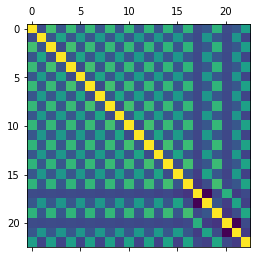

In [707]:
import matplotlib.pyplot as plt

plt.matshow(df_cor.corr())
plt.show()

In [708]:
corr = df_cor.corr()
corr.style.background_gradient(cmap='coolwarm')

,t1_3,t1_9,t2_3,t2_9,t3_3,t3_9,t4_3,t4_9,t5_3,t5_9,t6_3,t6_9,t7_3,t7_9,t8_3,t8_9,t9_3,t9_5,t9_9,t10_3,t10_5,t10_9,target
t1_3,1.000000,-0.138404,0.548371,-0.085231,0.523123,-0.081172,0.512346,-0.080528,0.502840,-0.078979,0.496493,-0.077558,0.488747,-0.077979,0.484125,-0.077131,0.480083,-0.135541,-0.076621,0.477344,-0.135371,-0.075460,0.349984
t1_9,-0.138404,1.000000,-0.085594,0.379586,-0.081847,0.327044,-0.080875,0.312808,-0.079618,0.305198,-0.079572,0.298491,-0.077627,0.293688,-0.077028,0.288759,-0.076709,-0.151023,0.285337,-0.076691,-0.149652,0.282696,-0.170819
t2_3,0.548371,-0.085594,1.000000,-0.138230,0.548741,-0.085249,0.523401,-0.081224,0.512619,-0.080593,0.503025,-0.079099,0.496826,-0.077703,0.489137,-0.077886,0.484197,-0.136844,-0.077081,0.480562,-0.135765,-0.076577,0.351375
t2_9,-0.085231,0.379586,-0.138230,1.000000,-0.085527,0.379936,-0.081832,0.327396,-0.080908,0.313136,-0.079497,0.305398,-0.079537,0.298734,-0.077636,0.293907,-0.076935,-0.153413,0.288916,-0.076735,-0.151176,0.285416,-0.171491
t3_3,0.523123,-0.081847,0.548741,-0.085527,1.000000,-0.138178,0.549156,-0.085310,0.523835,-0.081352,0.512807,-0.080572,0.503221,-0.079120,0.497355,-0.077795,0.489463,-0.138171,-0.077886,0.484689,-0.137124,-0.077112,0.353928
t3_9,-0.081172,0.327044,-0.085249,0.379936,-0.138178,1.000000,-0.085532,0.380044,-0.081916,0.327602,-0.080934,0.312970,-0.079561,0.305453,-0.079573,0.298835,-0.077737,-0.155954,0.294125,-0.077109,-0.153445,0.289017,-0.173328
t4_3,0.512346,-0.080875,0.523401,-0.081832,0.549156,-0.085532,1.000000,-0.138205,0.549518,-0.085501,0.524539,-0.081474,0.513458,-0.080744,0.503865,-0.079220,0.497748,-0.141554,-0.077923,0.490113,-0.138457,-0.077990,0.357276
t4_9,-0.080528,0.312808,-0.081224,0.327396,-0.085310,0.380044,-0.138205,1.000000,-0.085707,0.380296,-0.082138,0.327641,-0.081170,0.313074,-0.079698,0.305331,-0.079735,-0.160029,0.298889,-0.077932,-0.155770,0.294145,-0.175206
t5_3,0.502840,-0.079618,0.512619,-0.080908,0.523835,-0.081916,0.549518,-0.085707,1.000000,-0.138267,0.549854,-0.085541,0.524694,-0.081526,0.513917,-0.080836,0.504035,-0.142391,-0.079340,0.498238,-0.141653,-0.078003,0.360555
t5_9,-0.078979,0.305198,-0.080593,0.313136,-0.081352,0.327602,-0.085501,0.380296,-0.138267,1.000000,-0.085904,0.380268,-0.082308,0.327806,-0.081369,0.313050,-0.079834,-0.163982,0.305453,-0.079936,-0.159819,0.298831,-0.178569


Сколько уникальных id клиентов?

In [651]:
df_train['client_pin'].describe()

count                              5065350
unique                               79268
top       674595ee5acb8c2ede30dadfa722ba9d
freq                                  1646
Name: client_pin, dtype: object

In [652]:
cl_id = df_train['client_pin'].unique()

In [653]:
len(cl_id)

79268

In [656]:
df_gr = df_train.groupby(by='client_pin')

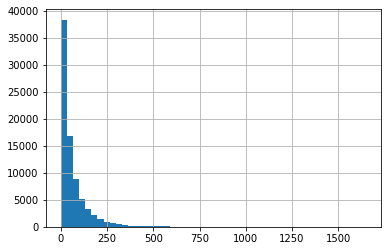

In [677]:
df_gr.size().hist(bins=50)

In [664]:
df_gr.size().describe()

count    79268.000000
mean        63.901574
std         85.280433
min          1.000000
25%         14.000000
50%         35.000000
75%         80.000000
max       1646.000000
dtype: float64

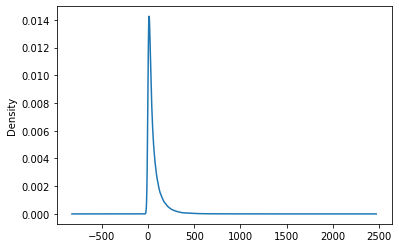

In [671]:
df_gr.size().plot.kde()

In [679]:
len(cl_data)

132

Работа с датами и с временем для поиска зависимости

In [3]:
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [74]:
df_train['week'] = df_train['timestamp'].dt.day_name()

In [75]:
df_train.head()

,session_id,client_pin,timestamp,multi_class_target,week,week_d
1157844,1fc688dcaa018f2434b023f6596833d7,53b340f5cabd10a48206a28199f4c7bf,2020-08-21 22:33:55,3,Friday,5
2630724,d7e707d1d63c892d364975ad5735a134,141de452e246edcf747bce0e1c9feb88,2020-07-03 09:50:53,6,Friday,5
3510124,3cf67acca02f6aec95a2d29f3f4a13dd,253b942cf249a68e7ef38378908305d4,2020-01-24 18:28:46,5,Friday,5
2630727,d7ea8082b6678301f9fe6c0c85bebf9e,8a3e8d9f82fa31a327ad8a719719aec9,2020-05-08 14:21:03,2,Friday,5
1555939,cc4c04e0fea6ee2dd2889e7970def3df,4cb939242fc51f88a41583a47d37b954,2020-03-20 13:24:01,0,Friday,5


In [6]:
df_train['week'].describe()

count     5065350
unique          7
top        Friday
freq       838830
Name: week, dtype: object

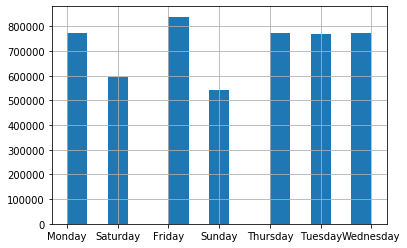

In [7]:
df_train['week'].hist(bins=15)

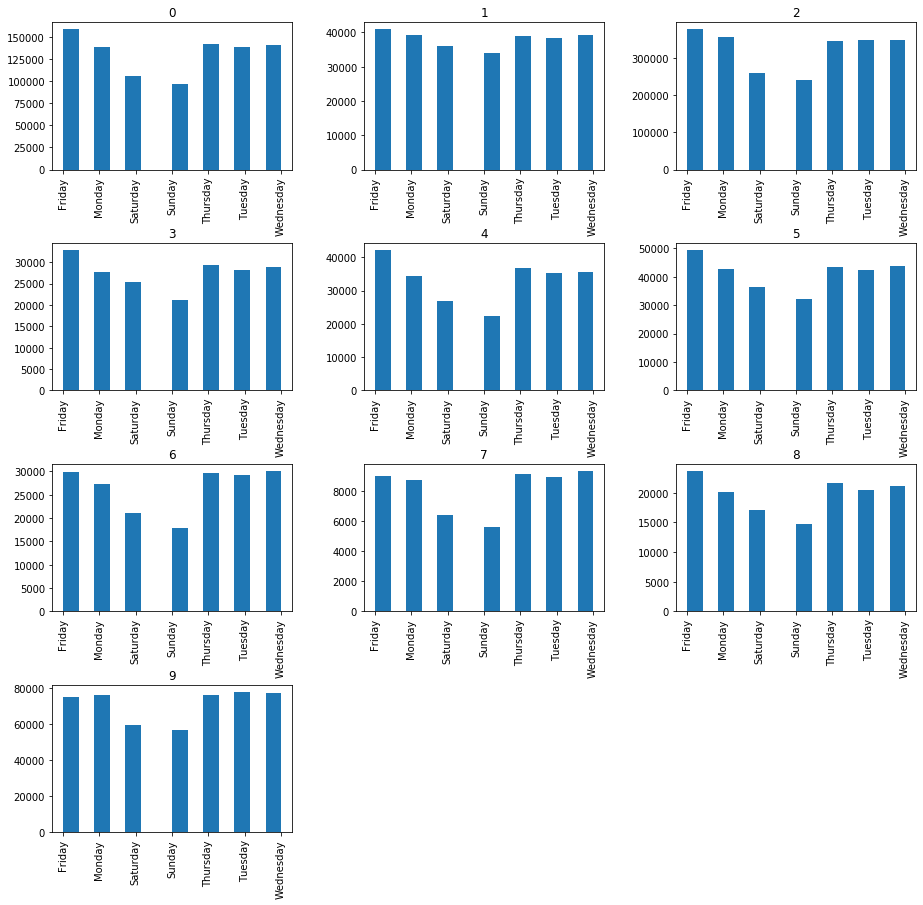

In [42]:
df_train.hist(column='week',  by='multi_class_target', figsize=(15,15), bins=14)
plt.show()

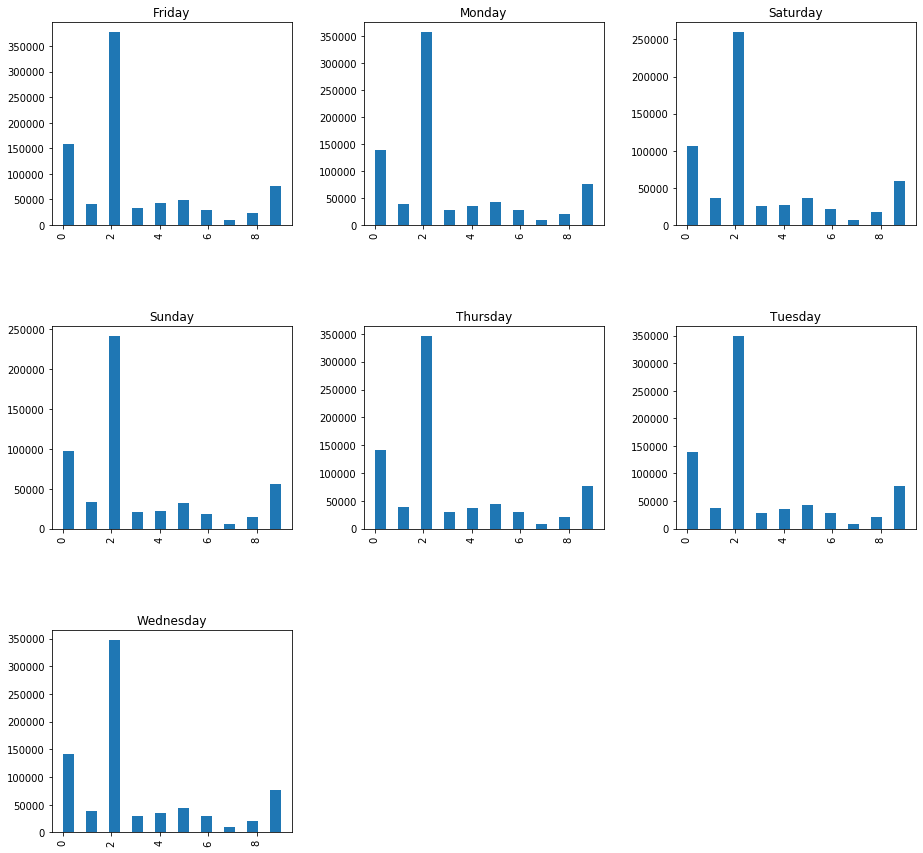

In [41]:
df_train.hist(column='multi_class_target',  by='week', figsize=(15,15), bins=19)
plt.show()

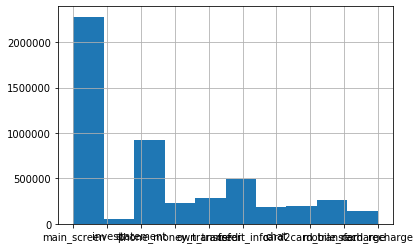

In [33]:
df_train['multi_class_target'].hist()

In [36]:
df_train['multi_class_target'] = df_train['multi_class_target'].apply(lambda x: 0 if x == 'statement' else x)
df_train['multi_class_target'] = df_train['multi_class_target'].apply(lambda x: 1 if x == 'mobile_recharge' else x)
df_train['multi_class_target'] = df_train['multi_class_target'].apply(lambda x: 2 if x == 'main_screen' else x)
df_train['multi_class_target'] = df_train['multi_class_target'].apply(lambda x: 3 if x == 'card2card_transfer' else x)
df_train['multi_class_target'] = df_train['multi_class_target'].apply(lambda x: 4 if x == 'phone_money_transfer' else x)
df_train['multi_class_target'] = df_train['multi_class_target'].apply(lambda x: 5 if x == 'own_transfer' else x)
df_train['multi_class_target'] = df_train['multi_class_target'].apply(lambda x: 6 if x == 'chat' else x)
df_train['multi_class_target'] = df_train['multi_class_target'].apply(lambda x: 7 if x == 'invest' else x)
df_train['multi_class_target'] = df_train['multi_class_target'].apply(lambda x: 8 if x == 'card_recharge' else x)
df_train['multi_class_target'] = df_train['multi_class_target'].apply(lambda x: 9 if x == 'credit_info' else x)

In [47]:
label = ['statement', 'mobile_recharge', 'main_screen', 'card2card_transfer', 'phone_money_transfer',
        'own_transfer', 'chat', 'invest', 'card_recharge', 'credit_info']

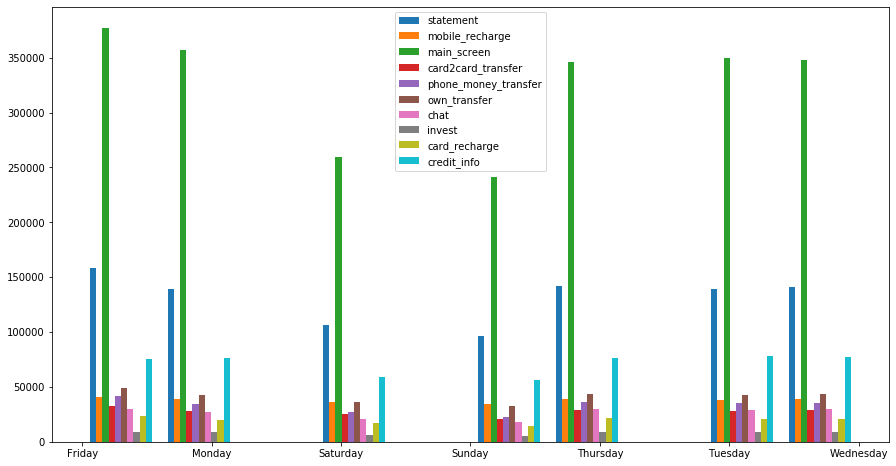

In [58]:
plt.figure(figsize=[15,8])
t0 = df_train[df_train['multi_class_target'] == 0]['week']
t1 = df_train[df_train['multi_class_target'] == 1]['week']
t2 = df_train[df_train['multi_class_target'] == 2]['week']
t3 = df_train[df_train['multi_class_target'] == 3]['week']
t4 = df_train[df_train['multi_class_target'] == 4]['week']
t5 = df_train[df_train['multi_class_target'] == 5]['week']
t6 = df_train[df_train['multi_class_target'] == 6]['week']
t7 = df_train[df_train['multi_class_target'] == 7]['week']
t8 = df_train[df_train['multi_class_target'] == 8]['week']
t9 = df_train[df_train['multi_class_target'] == 9]['week']
plt.hist([t0, t1, t2, t3, t4, t5, t6, t7, t8, t9])
plt.legend(label)

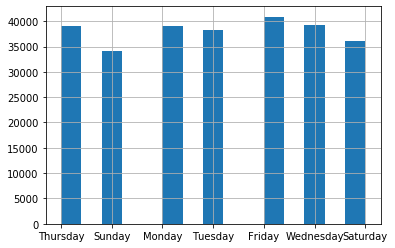

In [39]:
df_train[df_train['multi_class_target'] == 1]['week'].hist(bins=15)

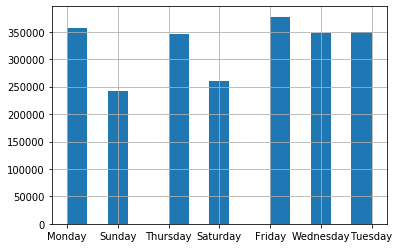

In [13]:
df_train[df_train['multi_class_target'] == 2]['week'].hist(bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BB2FFCAC08>]],
      dtype=object)

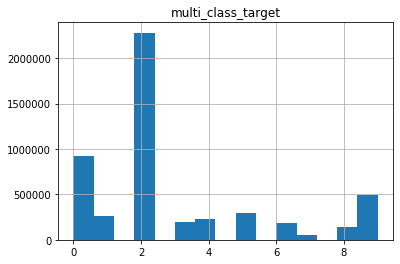

In [15]:
df_train[['multi_class_target','week']].hist(bins=15)

In [17]:
import plotly.express as px
# Here we use a column with categorical data
fig = px.histogram(df_train, x="week")
fig.show()

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [63]:
df_train['week'].unique()

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [73]:
vect_w = CountVectorizer()

In [80]:
X_w = vect_w.fit(df_train['week'].unique())

In [83]:
X_trw = vect_w.transform(df_train['week']).toarray()


In [84]:
X_trw = pd.DataFrame(X_trw)

In [90]:
pd.concat([df_train['multi_class_target'], X_trw], axis=1).corr(method='spearman')

,multi_class_target,0,1,2,3,4,5,6
multi_class_target,1.000000,0.000098,-0.000614,0.000050,0.000677,-0.000074,-0.000149,0.000108
0,0.000098,1.000000,-0.188960,-0.162438,-0.154358,-0.189173,-0.188444,-0.189236
1,-0.000614,-0.188960,1.000000,-0.154656,-0.146963,-0.180111,-0.179416,-0.180171
2,0.000050,-0.162438,-0.154656,1.000000,-0.126335,-0.154830,-0.154233,-0.154882
3,0.000677,-0.154358,-0.146963,-0.126335,1.000000,-0.147129,-0.146561,-0.147178
4,-0.000074,-0.189173,-0.180111,-0.154830,-0.147129,1.000000,-0.179618,-0.180373
5,-0.000149,-0.188444,-0.179416,-0.154233,-0.146561,-0.179618,1.000000,-0.179678
6,0.000108,-0.189236,-0.180171,-0.154882,-0.147178,-0.180373,-0.179678,1.000000


In [74]:
df_train['week'] = df_train['timestamp'].dt.day_name()

In [3]:
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [695]:
data_nonbinary = np.concatenate((X_train0,X_train1,X_train2,X_train3,X_train4,X_train5,X_train6,
                                X_train7,X_train8,X_train9), axis=1)

In [14]:
a = [5, 2, 'r', 4, 'ee']
b = [4, 1, 'we', 'ee', 2, 'r']
c = list(set(a) & set(b))
print(c)

['r', 2, 'ee', 4]


In [161]:
pred_d = gbc.predict(data_out)[0]

In [165]:
transform_target(pred_d)

'main_screen'

In [171]:
df_res[df_res['client_pin'] == i]

,client_pin,prediction
18719,384a79711595fd2eaa34f08dbee384d8,main_screen


In [170]:
df_res['prediction'][df_res['client_pin'] == i]=transform_target(pred_d)